# Imports
Importing pandas and data files

In [1]:
import os, numpy as np, pandas as pd
file = os.sep.join(['seeds_dataset.txt'])
data = pd.read_csv(file, sep="\t", header=None, names=["Area", "Perimeter", "Compactness", "Length of Kernel","Width of Kernel","Asymmetry coefficient"," Length of kernel groove","Label"])

#data=data.drop(columns=['h'])
data.head()

,Area,Perimeter,Compactness,Length of Kernel,Width of Kernel,Asymmetry coefficient,Length of kernel groove,Label
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


In [2]:
# Number of rows
print("no. of rows = ",data.shape[0],"\n")

# Column names
print("the columns are",data.columns.tolist(),"\n")

# Data types
print(data.dtypes)

no. of rows =  210 

the columns are ['Area', 'Perimeter', 'Compactness', 'Length of Kernel', 'Width of Kernel', 'Asymmetry coefficient', ' Length of kernel groove', 'Label'] 

Area                        float64
Perimeter                   float64
Compactness                 float64
Length of Kernel            float64
Width of Kernel             float64
Asymmetry coefficient       float64
 Length of kernel groove    float64
Label                         int64
dtype: object


# EDA
Commence the EDA

In [3]:
data['Compactness'].describe()

count    210.000000
mean       0.870999
std        0.023629
min        0.808100
25%        0.856900
50%        0.873450
75%        0.887775
max        0.918300
Name: Compactness, dtype: float64

# Plotting
Do the plots


[Text(0,0.5,'Perimeter'), Text(0.5,0,'Area'), Text(0.5,1,'Area vs Perimeter')]

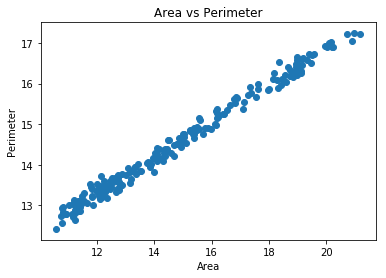

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
# A simple scatter plot with Matplotlib
ax = plt.axes()

ax.scatter(data['Area'], data['Perimeter'])

# Label the axes
ax.set(xlabel='Area',
       ylabel='Perimeter',
       title='Area vs Perimeter')

We can say Area and Perimeter have a proportional relationship

/home/mandala/.local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


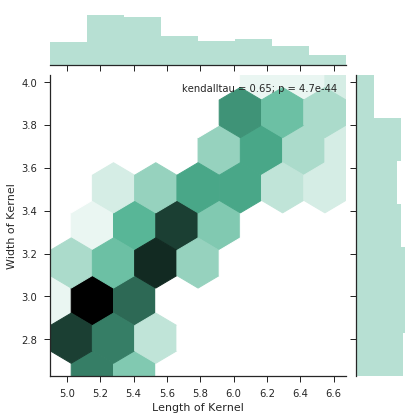

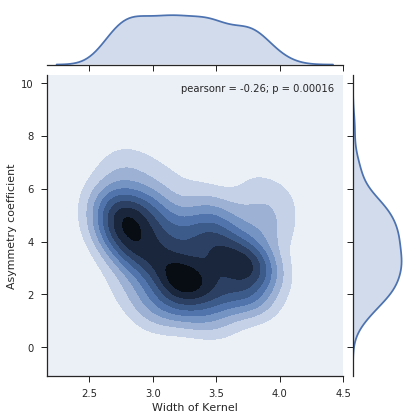

In [5]:
import seaborn as sns
from scipy.stats import kendalltau
sns.set(style="ticks")

sns.jointplot(data['Length of Kernel'], data['Width of Kernel'], kind="hex", stat_func=kendalltau, color="#4CB391")
sns.jointplot(x="Width of Kernel", y="Asymmetry coefficient", data=data, kind="kde");

https://en.wikipedia.org/wiki/Kendall_rank_correlation_coefficient

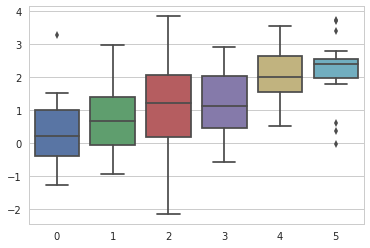

In [6]:
sns.set_style("whitegrid")
databp = np.random.normal(size=(20, 6)) + np.arange(6) / 2
sns.boxplot(data=databp);   ####EDA

KeyboardInterrupt: 

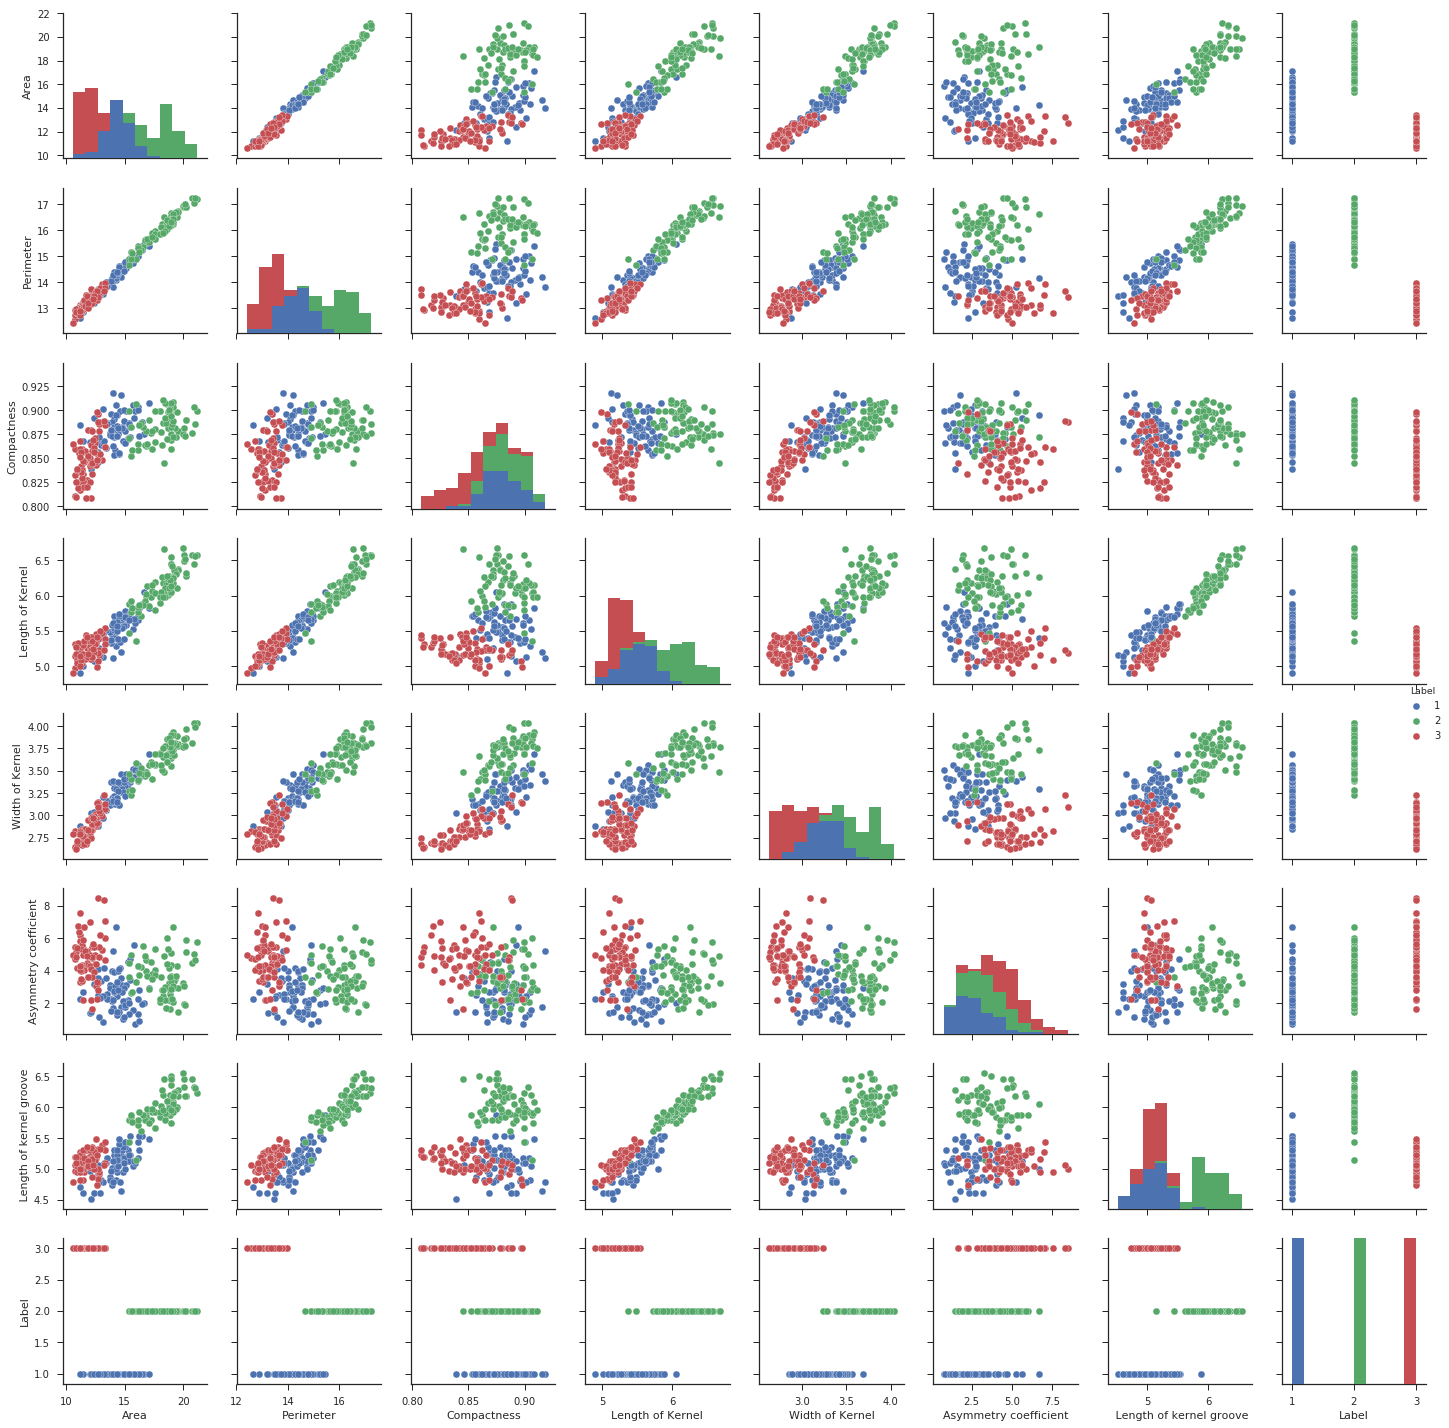

In [7]:
sns.set(style="ticks")
#scatter_data = data
#df = pd.DataFrame(data,index=data[:,0]),
data_pairplot=data.drop(columns=['Label'])
sns.pairplot(data,hue='Label')

In [ ]:
df = data
f, ax = plt.subplots(figsize=(10, 8))
corr = df.corr()

sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True), square=True, ax=ax)

In [ ]:
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D

fig = pyplot.figure()
ax = Axes3D(fig)

one_data = data[data.Label == 1]
two_data = data[data.Label == 2]
three_data = data[data.Label == 3]

d1 = list(one_data.get("Area"))
d2 = list(one_data.get("Length of Kernel"))
d3 = list(one_data.get("Width of Kernel"))

d4 = list(two_data.get("Area"))
d5 = list(two_data.get("Length of Kernel"))
d6 = list(two_data.get("Width of Kernel"))

d7 = list(three_data.get("Area"))
d8 = list(three_data.get("Length of Kernel"))
d9 = list(three_data.get("Width of Kernel"))

ax.scatter(d1,d2,d3,c='b')
ax.scatter(d4,d5,d6,c='r')
ax.scatter(d7,d8,d9,c='g')
pyplot.show()

# PlotCeption

In [ ]:
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D

for column1 in data:
    for column2 in data:
        for column3 in data:
            fig = pyplot.figure()
            ax = Axes3D(fig)
            d1 = list(one_data.get(column1))
            d2 = list(one_data.get(column2))
            d3 = list(one_data.get(column3))

            d4 = list(two_data.get(column1))
            d5 = list(two_data.get(column2))
            d6 = list(two_data.get(column3))

            d7 = list(three_data.get(column1))
            d8 = list(three_data.get(column2))
            d9 = list(three_data.get(column3))
    
            ax.scatter(d1,d2,d3,c='b')
            ax.scatter(d4,d5,d6,c='r')
            ax.scatter(d7,d8,d9,c='g')


            pyplot.show()

# DBSCAN loop
finding the best parameters for the clustering

In [ ]:
#get_ipython().run_line_magic('matplotlib', 'inline')


import os, numpy as np, pandas as pd
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import StandardScaler

file = os.sep.join(['seeds_dataset.txt'])
data = pd.read_csv(file, sep="\t", header=None, names=["Area", "Perimeter", "Compactness", "Length of Kernel","Width of Kernel","Asymmetry coefficient"," Length of kernel groove","Label"])

#data=data.drop(columns=['h'])
#data.head()




# #############################################################################
# Points
for i in range (0,7):
    for j in range (0,7):
        X= []
        for instance in data.values:
            tempL = []
            tempL.append(instance[i])
            tempL.append(instance[j])
            X.append(tempL)
        labels_true=data['Label'].values
        #print(labels_true)
        X = StandardScaler().fit_transform(X)

# #############################################################################
# Compute DBSCAN
        db = DBSCAN(eps=0.2, min_samples=5).fit(X)
        core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
        core_samples_mask[db.core_sample_indices_] = True
        labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
        n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

        print('Estimated number of clusters: %d' % n_clusters_)
        print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
        print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
        print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
        print("Adjusted Rand Index: %0.3f" % metrics.adjusted_rand_score(labels_true, labels))
        print("Adjusted Mutual Information: %0.3f" % metrics.adjusted_mutual_info_score(labels_true, labels))
     #   print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(X, labels))

# #############################################################################
# Plot result
        import matplotlib.pyplot as plt

# Black removed and is used for noise instead.
        unique_labels = set(labels)
        colors = [plt.cm.Spectral(each)
                  for each in np.linspace(0, 1, len(unique_labels))]
        for k, col in zip(unique_labels, colors):
            if k == -1:
        # Black used for noise.
                col = [0, 0, 0, 1]

            class_member_mask = (labels == k)

            xy = X[class_member_mask & core_samples_mask]
            plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

            xy = X[class_member_mask & ~core_samples_mask]
            plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

        plt.title('Estimated number of clusters: %d' % n_clusters_)
        plt.show()


# SOM

[[15.26   14.84    0.871 ]
 [14.88   14.57    0.8811]
 [14.29   14.09    0.905 ]
 [13.84   13.94    0.8955]
 [16.14   14.99    0.9034]
 [14.38   14.21    0.8951]
 [14.69   14.49    0.8799]
 [14.11   14.1     0.8911]
 [16.63   15.46    0.8747]
 [16.44   15.25    0.888 ]
 [15.26   14.85    0.8696]
 [14.03   14.16    0.8796]
 [13.89   14.02    0.888 ]
 [13.78   14.06    0.8759]
 [13.74   14.05    0.8744]
 [14.59   14.28    0.8993]
 [13.99   13.83    0.9183]
 [15.69   14.75    0.9058]
 [14.7    14.21    0.9153]
 [12.72   13.57    0.8686]
 [14.16   14.4     0.8584]
 [14.11   14.26    0.8722]
 [15.88   14.9     0.8988]
 [12.08   13.23    0.8664]
 [15.01   14.76    0.8657]
 [16.19   15.16    0.8849]
 [13.02   13.76    0.8641]
 [12.74   13.67    0.8564]
 [14.11   14.18    0.882 ]
 [13.45   14.02    0.8604]
 [13.16   13.82    0.8662]
 [15.49   14.94    0.8724]
 [14.09   14.41    0.8529]
 [13.94   14.17    0.8728]
 [15.05   14.68    0.8779]
 [16.12   15.      0.9   ]
 [16.2    15.27    0.8734]
 

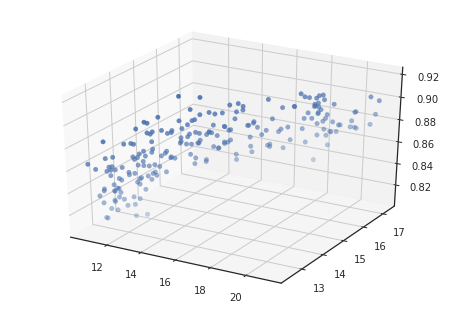

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import somoclu
%matplotlib inline 
###################
c1 = list(data['Area'].values)
c2 = list(data['Perimeter'].values)
c3 = list(data['Compactness'].values)
#data_somo = np.float32(np.concatenate((c1, c2, c3)))
data_somo=[]
for i in range(0, len(c1)):
    data_somo.append([c1[i],c2[i],c3[i]])
data_somo=np.array(data_somo)
print(data_somo)
colors = ["red"] * 50
colors.extend(["green"] * 50)
colors.extend(["blue"] * 50)
fig = plt.figure()
ax = Axes3D(fig)
#ax.scatter(data[:, 0], data[:, 1], data[:, 2], c=colors)
ax.scatter(c1,c2,c3)
labels = range(150)

In [24]:
n_rows, n_columns = 100, 160
som = somoclu.Somoclu(n_columns, n_rows, data=data_somo)
%time som.train()

CPU times: user 12.5 s, sys: 17.8 ms, total: 12.5 s
Wall time: 1.63 s


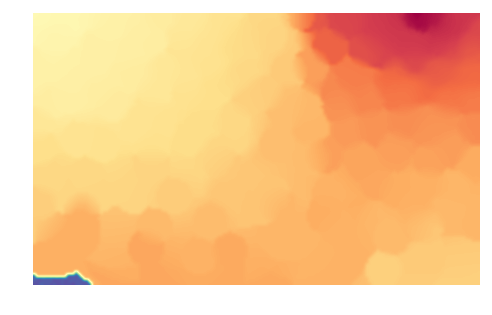

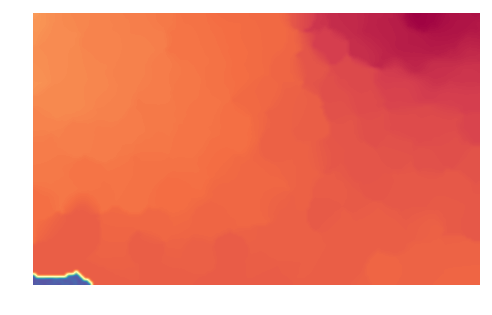

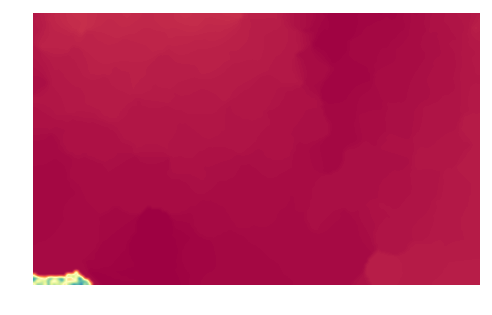

<module 'matplotlib.pyplot' from '/home/mandala/.local/lib/python3.6/site-packages/matplotlib/pyplot.py'>

In [25]:
som.view_component_planes()

In [19]:
c1 = np.random.rand(50, 3)/5
c2 = (0.6, 0.1, 0.05) + np.random.rand(50, 3)/5
c3 = (0.4, 0.1, 0.7) + np.random.rand(50, 3)/5
datafuckyou = np.float32(np.concatenate((c1, c2, c3)))
print(datafuckyou)

[[1.68897778e-01 1.62146419e-01 1.86289132e-01]
 [1.06404379e-01 2.47129835e-02 2.95179654e-02]
 [1.37004510e-01 1.56982094e-02 9.37905256e-03]
 [7.97871202e-02 1.97169766e-01 1.64728492e-01]
 [1.67575926e-01 1.40959948e-01 3.50711085e-02]
 [1.04495183e-01 6.43740669e-02 1.68143496e-01]
 [1.20533675e-01 8.92011076e-02 1.03504211e-01]
 [7.60908658e-03 1.45412713e-01 9.67661440e-02]
 [3.65411155e-02 1.33096039e-01 1.91421598e-01]
 [1.48089752e-01 1.10190026e-01 1.51147619e-01]
 [5.00176847e-02 1.78891364e-02 2.11363134e-04]
 [5.92091270e-02 8.06256905e-02 6.46547750e-02]
 [2.40467605e-03 6.54471070e-02 5.59478216e-02]
 [4.41313386e-02 9.82238725e-02 1.64847165e-01]
 [4.74190116e-02 1.08450897e-01 1.99696749e-01]
 [1.56422406e-01 1.64290592e-01 4.50383220e-03]
 [1.97933987e-01 1.08237676e-01 6.54600412e-02]
 [1.23724237e-01 4.44534980e-02 1.43651024e-01]
 [1.05210461e-01 1.60291865e-01 1.91941366e-01]
 [1.60947084e-01 4.36019339e-02 2.20518168e-02]
 [1.58971414e-01 9.66998711e-02 1.482133